In [35]:
import pandas as pd 
import numpy as np
import re 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer 
corpus = []  

reviews= pd.read_csv('newdata.csv')

print(reviews.columns)
df=reviews.head(1000)

/usr/local/Cellar/ipython/7.2.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,13,14,15,16,18,20,21,22,23,24,25,26,27,30,32,34,35,37,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'business_id', 'city',
       'hours', 'name', 'review_count', 'stars_x', 'state', 'AgesAllowed',
       'Alcohol', 'Ambience', 'BYOB', 'BYOBCorkage', 'BestNights',
       'BikeParking', 'BusinessAcceptsBitcoin', 'BusinessAcceptsCreditCards',
       'BusinessParking', 'ByAppointmentOnly', 'Caters', 'CoatCheck',
       'Corkage', 'DietaryRestrictions', 'DogsAllowed', 'DriveThru',
       'GoodForDancing', 'GoodForKids', 'GoodForMeal', 'HappyHour', 'HasTV',
       'Music', 'NoiseLevel', 'Open24Hours', 'OutdoorSeating',
       'RestaurantsAttire', 'RestaurantsCounterService', 'RestaurantsDelivery',
       'RestaurantsGoodForGroups', 'RestaurantsPriceRange2',
       'RestaurantsReservations', 'RestaurantsTableService',
       'RestaurantsTakeOut', 'Smoking', 'WiFi_'free'', 'WiFi_None',
       'WiFi_u'free'', 'WiFi_u'no'', 'WiFi_u'paid'', 'date', 'funny',
       'review_id', 'stars_y', 'text', 'useful', 'user_id', 'category'],
      dtyp

In [37]:
print(df.head())

   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1             business_id  \
0           0            66              53  q2KtxnPa6rPSpAlMbg9l8g   
1           1            67              53  q2KtxnPa6rPSpAlMbg9l8g   
2           2            68              53  q2KtxnPa6rPSpAlMbg9l8g   
3           3            69              53  q2KtxnPa6rPSpAlMbg9l8g   
4           4            70              53  q2KtxnPa6rPSpAlMbg9l8g   

         city                                              hours  \
0  Scottsdale  {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...   
1  Scottsdale  {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...   
2  Scottsdale  {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...   
3  Scottsdale  {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...   
4  Scottsdale  {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...   

                  name  review_count  stars_x state  ... WiFi_u'no'  \
0  Nothing Bundt Cakes           174      4.0    AZ  ...          0   
1  Nothing Bundt Cakes

<h3> Review Analysis </h3>

In [48]:

df = df[['business_id','name','text','stars_y']]
X = df['text']
y = df['stars_y']
y=y.astype('int')

In [49]:
import string
def text_process(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)


In [53]:
X = bow_transformer.transform(X)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [55]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
preds = nb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[30  1  0  9  2]
 [ 5  1  0 13  5]
 [ 1  0  1 28  6]
 [ 1  0  1 53 21]
 [ 2  0  0 45 75]]


              precision    recall  f1-score   support

           1       0.77      0.71      0.74        42
           2       0.50      0.04      0.08        24
           3       0.50      0.03      0.05        36
           4       0.36      0.70      0.47        76
           5       0.69      0.61      0.65       122

    accuracy                           0.53       300
   macro avg       0.56      0.42      0.40       300
weighted avg       0.58      0.53      0.50       300



In [56]:
positive_review = df['text'][59]
print(positive_review)

Good bundt cakes.  Just make sure what you requested is in your bag.  And yes, I ate what they gave me because by the time I noticed the problem, they were closed. I would have preferred what I originally asked for.  I wonder if I can return an empty box.


In [57]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

3

In [74]:
neg_review2= df['text'][983]
print(neg_review2)

Just had the worst pizza of my life. We picked up after waiting 20 minutes longer than they said. We could not even eat the pizza when we got it home. The crust was so tough you could not cut it. The pizza was so awful we actually called the restaurant to tell them. They said it was because of the type of pizza we ordered!  Thin crust????  I don't know how they can be in business with all the competition out there


In [75]:
negative_review_transformed = bow_transformer.transform([neg_review2])
nb.predict(negative_review_transformed)[0]

1

In [90]:
reviews['labels'] = ''
reviews.loc[reviews.stars_y >=4, 'labels'] = 'positive'
reviews.loc[reviews.stars_y ==3, 'labels'] = 'neural'
reviews.loc[reviews.stars_y <3, 'labels'] = 'negative'


table = pd.pivot_table(reviews, values=["business_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
table = pd.pivot_table(reviews, values=["business_id"], index=["category"],columns=["labels"], 
                       aggfunc=len, margins=True, dropna=True,fill_value=0)


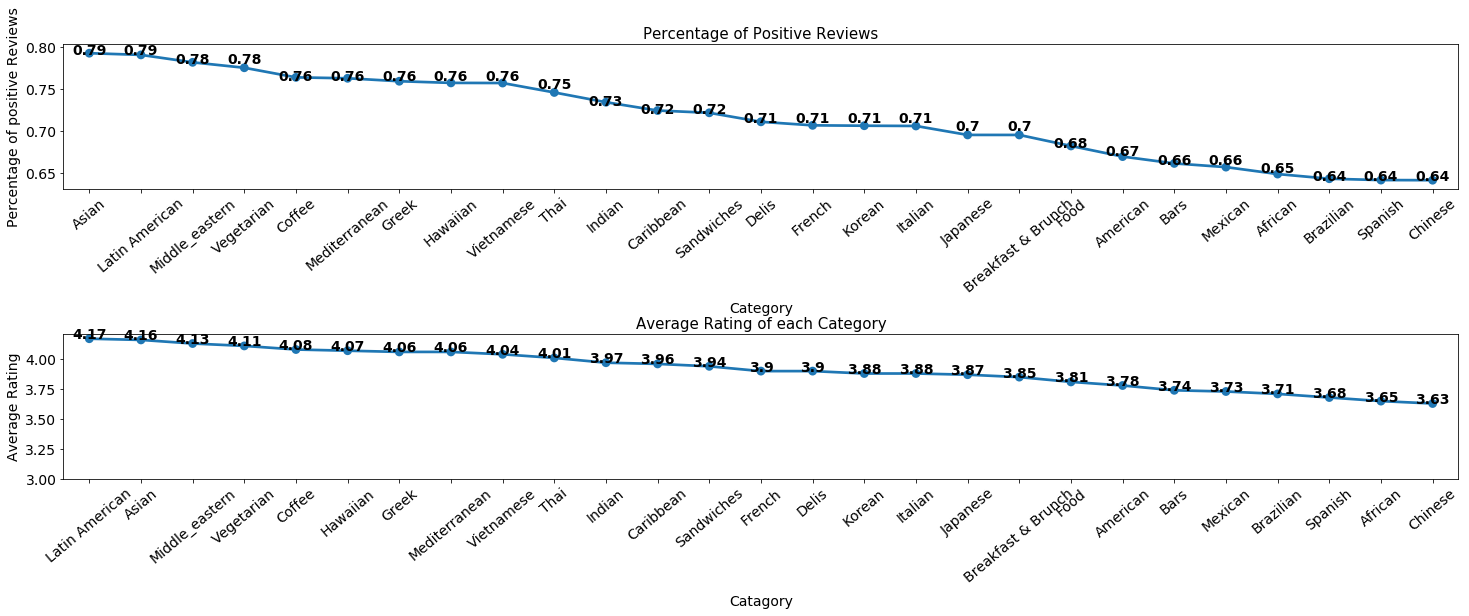

In [94]:
plt.rcParams["xtick.labelsize"] = 7
table_percentage = table.div( table.iloc[:,-1], axis=0).iloc[:-1,-2].sort_values(ascending=False)
plt.figure(figsize=(25,8))
plt.subplot(211)
sns.pointplot(x=table_percentage.index, y= table_percentage.values)
plt.xlabel('Category', labelpad=7, fontsize=14)
plt.ylabel('Percentage of positive Reviews', fontsize=14)
plt.title('Percentage of Positive Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(table_percentage.round(2)):
    plt.text(i, v*1.001, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplot(212)
grouped = reviews.groupby('category')['stars_y'].mean().round(2).sort_values(ascending=False)
sns.pointplot(grouped.index, grouped.values)
plt.ylim(3)
plt.xlabel('Catagory', labelpad=10, fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating of each Category', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=40)
for  i, v in enumerate(grouped):
    plt.text(i, v, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)
    
plt.subplots_adjust(hspace=1)

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [96]:
def senti(x):
    return TextBlob(x).sentiment  

df1['senti_score'] = df1['text'].apply(senti)

/usr/local/Cellar/ipython/7.2.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [97]:
print(df1['senti_score'])

0        (0.1088033008658009, 0.5844891774891776)
1        (0.4625000000000001, 0.6583333333333333)
2       (0.18680555555555556, 0.4733796296296296)
3                                    (0.625, 0.7)
4      (0.38296296296296295, 0.44592592592592595)
5       (0.43611111111111106, 0.4322222222222223)
6        (0.5049169146825396, 0.5834353741496598)
7       (0.14431818181818182, 0.5181818181818182)
8                                    (0.595, 1.0)
9                                 (0.609375, 0.8)
10      (0.23985389610389607, 0.7012987012987013)
11     (0.054000000000000006, 0.5680000000000001)
12                                 (0.3125, 0.75)
13       (0.2661111111111111, 0.5357407407407407)
14       (0.3939393939393939, 0.5545454545454546)
15     (0.30853571428571425, 0.48485714285714276)
16                      (0.3, 0.5638888888888889)
17                     (0.5, 0.43333333333333335)
18       (0.1488888888888889, 0.3266666666666667)
19     (-0.25277777777777777, 0.4333333333333333)


In [99]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]
df1=df1.head(10000)
for word in df1['text']:
    if (sid.polarity_scores(word)['compound']) >= 0.5:
        pos_word_list.append(word)
    elif (sid.polarity_scores(word)['compound']) <= -0.5:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)  

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vanessa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


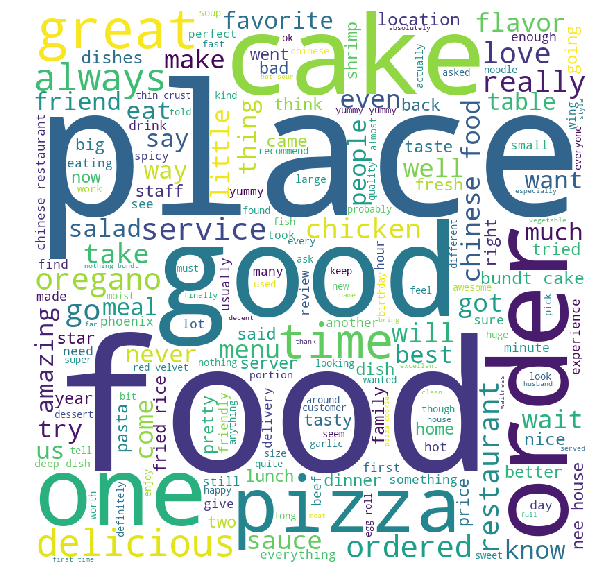

In [100]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
stopwords = set(STOPWORDS) 
comment_words = ' '  
# iterate through the csv file 
for val in pos_word_list:
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

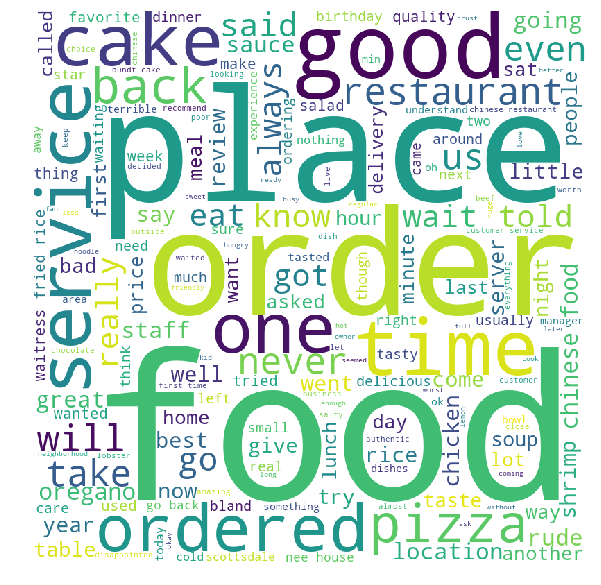

In [101]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
stopwords = set(STOPWORDS) 
comment_words = ' '  
# iterate through the csv file 
for val in neu_word_list:
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

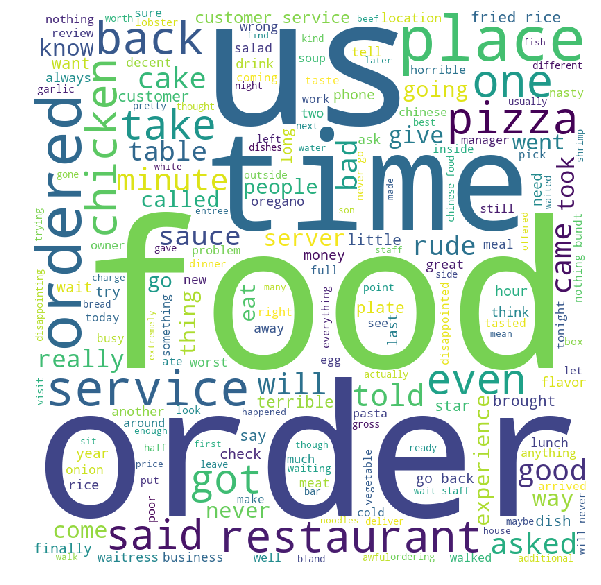

In [102]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
stopwords = set(STOPWORDS) 
comment_words = ' '  
# iterate through the csv file 
for val in neg_word_list:
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 